<a href="https://colab.research.google.com/github/IzzatunNauly/pcvk_genap_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metode Deteksi Objek: Template Matching, Edge Detection, Corner Detection, Grid Detection, Contour Detection

## Nomor 1
Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab 
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week11.ipynb”. 
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan 
cara sebagai berikut.

### Object Detection

Metode yang digunakan :

1. Template Matching

2. Edge Detection

3. Corner Detection

4. Grid Detection

5. Contour Detection

In [1]:
#import library yang dibutuhkan
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Nomor 2
Implementasikan 6 metode template matching pada OpenCV dengan menggunakan 
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya. 

### Template Maching
menggunakan library open CV:
cv.matchTemplate(), dengan parameter:
- image:citra input
- templ:templet yang dicari ukurannya tidak boleh lebih besar dari cintra input
- method:metode dari template matching
jenis metode template matching di OpenCV:
1. TM_SQDIFF
2. TM_SQDIFF_NORMET
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

Sehingga menghasilkan luaran seperti berikut:

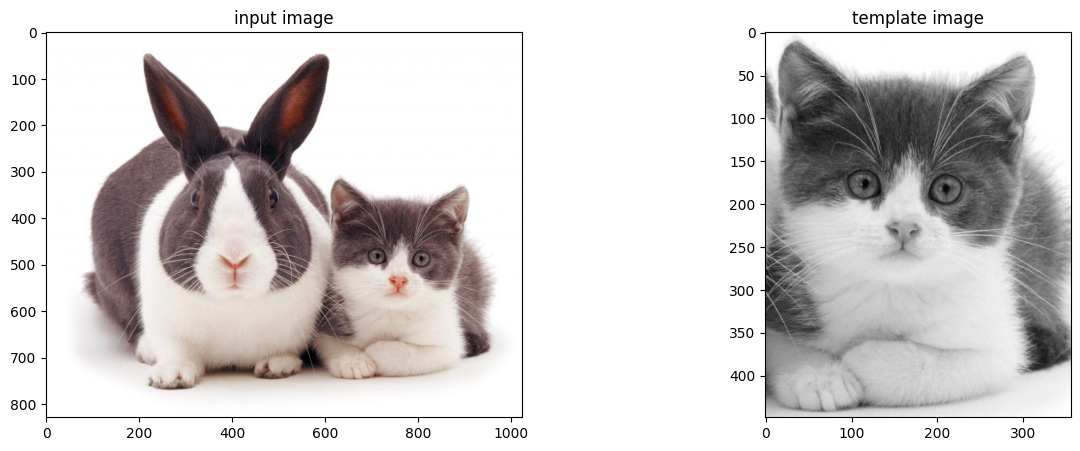

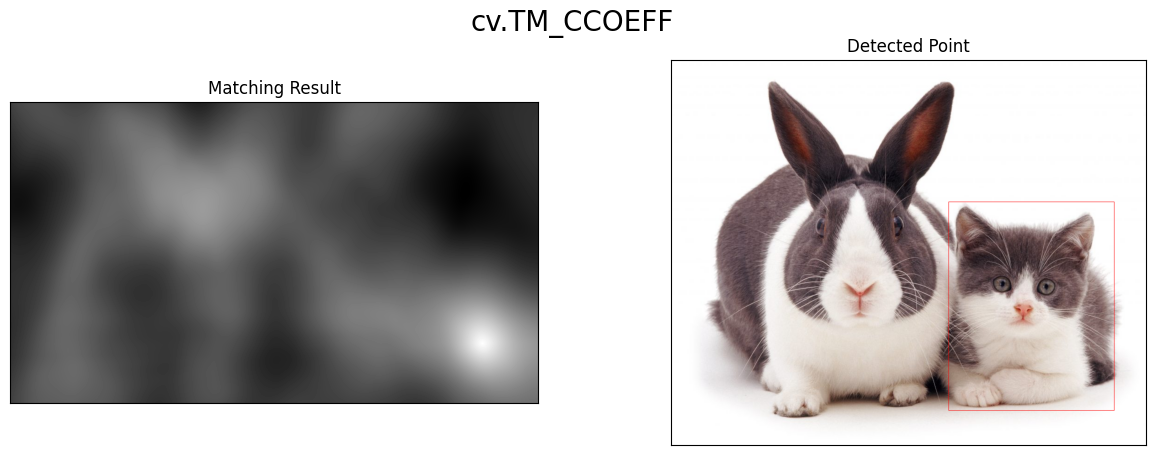

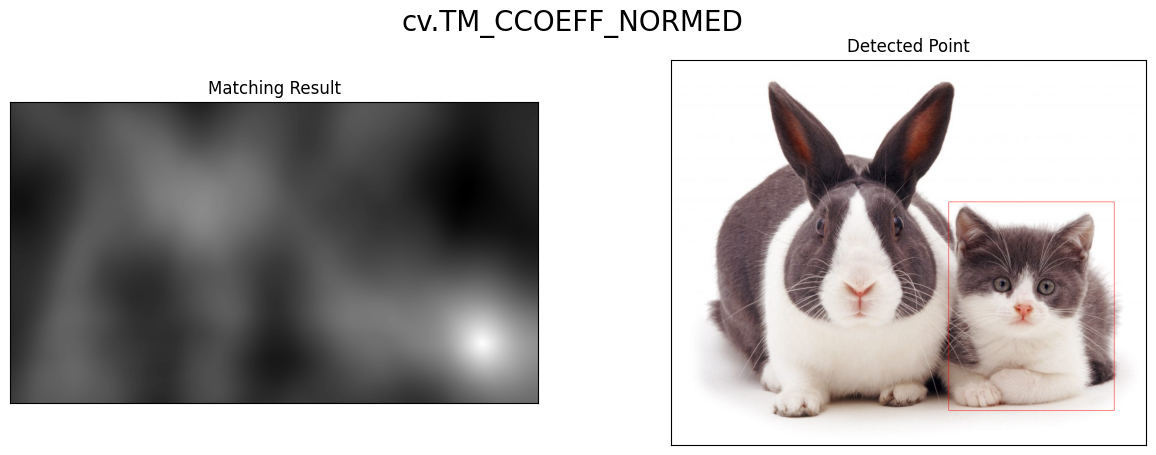

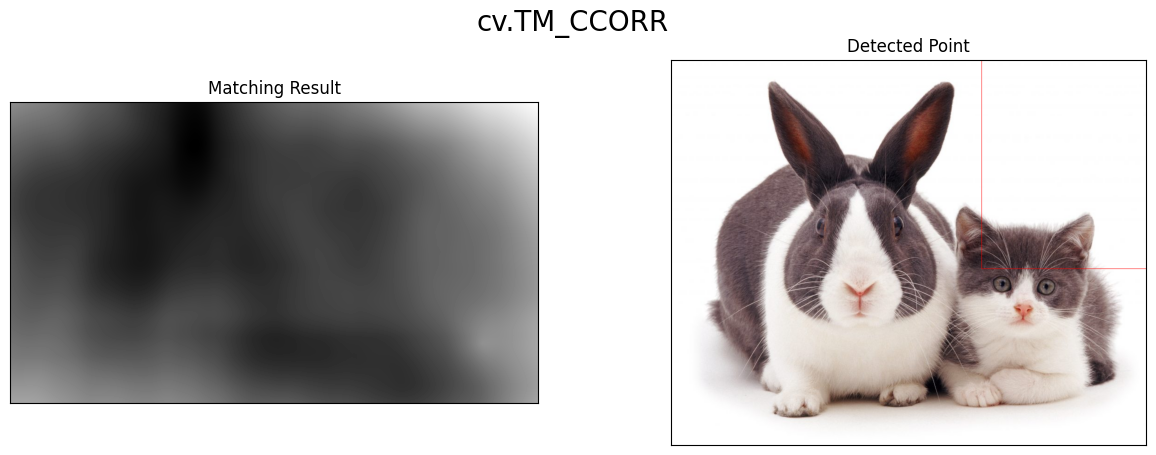

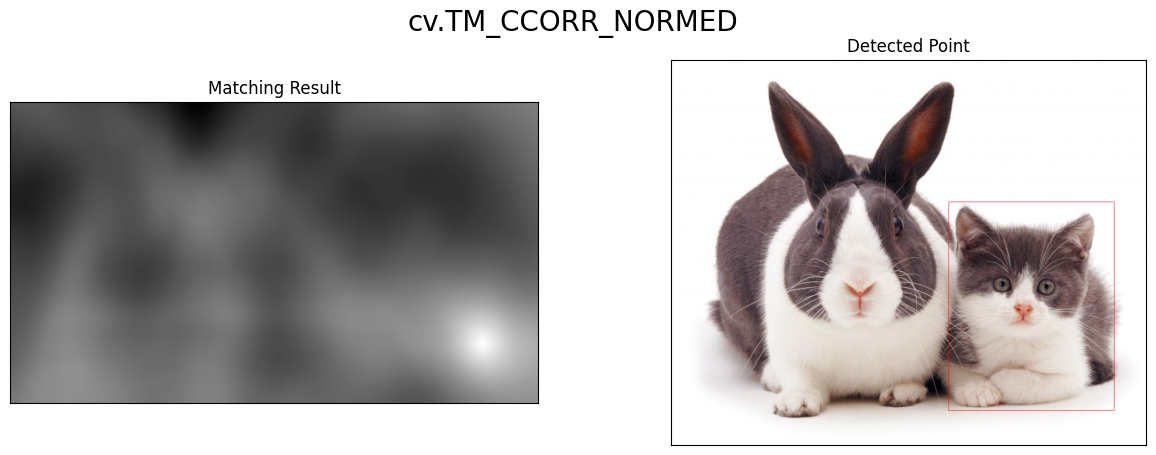

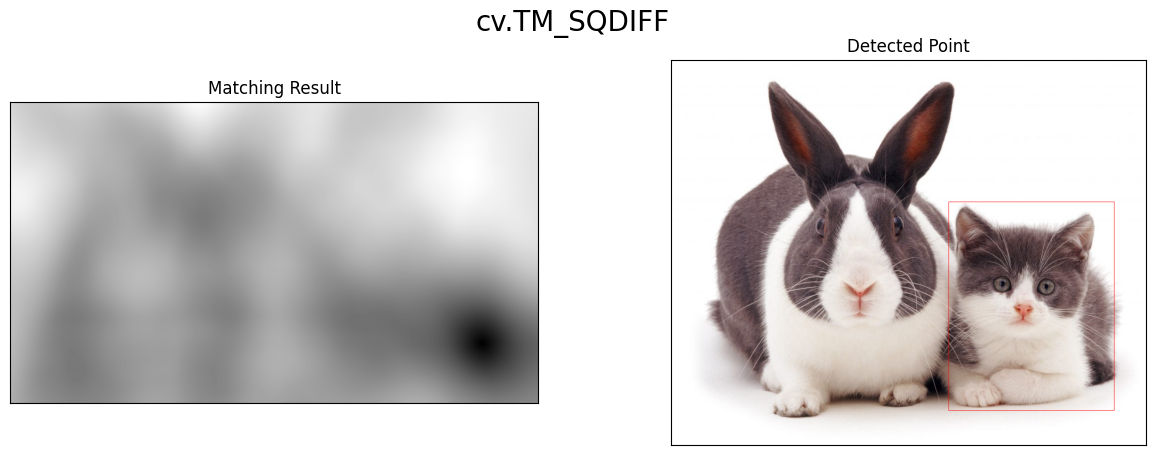

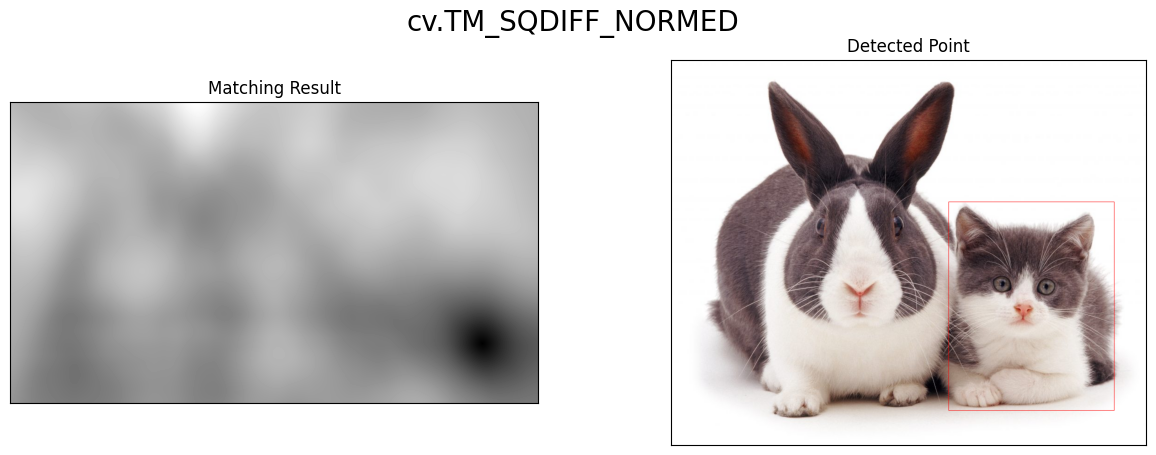

In [3]:
# load citra input 
img = cv.imread('/content/drive/MyDrive/Mechine Learning /cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/Mechine Learning /cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
            
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

## Nomor 3
Implementasikan konsep template matching tanpa menggunakan library OpenCV 
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan 
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai 
berikut: 

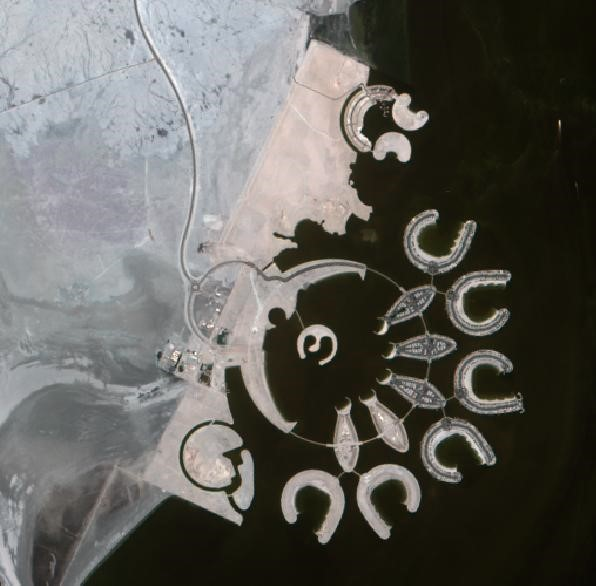

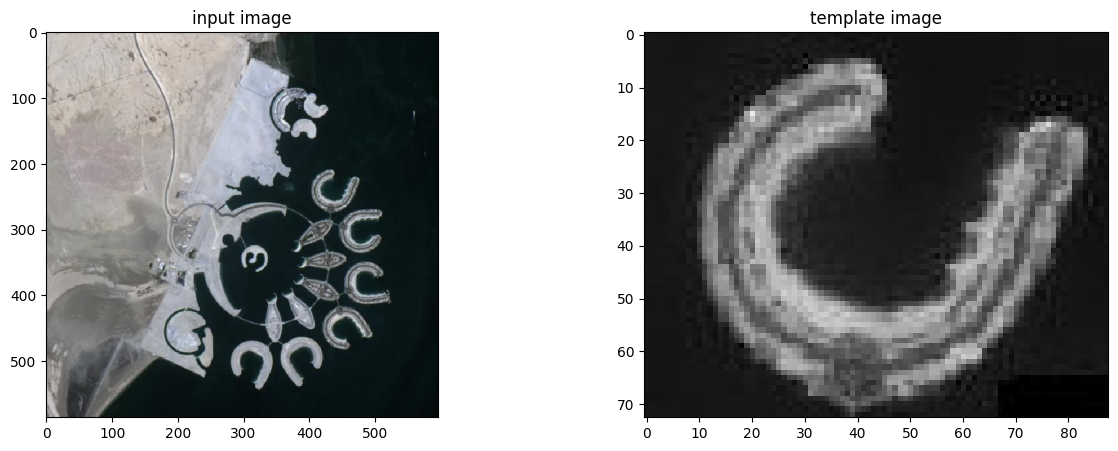

In [8]:
import numpy as np
from PIL import Image

# load citra input 
img = cv.imread('/content/drive/MyDrive/Mechine Learning /bahrain.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/Mechine Learning /bahrain-template.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Tentukan ukuran citra input dan citra template
height, width = img_gray.shape[:2]
template_height, template_width = template.shape[:2]

# Set threshold similarity
threshold = 1500

# Inisialisasi list untuk menampung posisi kotak yang cocok
matches = []

# Lakukan iterasi pada citra input
for y in range(height - template_height):
    for x in range(width - template_width):
        # Ambil jendela berukuran sama dengan citra template pada setiap posisi piksel citra input
        window = img_gray[y:y+template_height, x:x+template_width]

        # Hitung nilai similarity antara citra template dengan jendela citra input menggunakan metode cross correlation
        similarity = np.sum((template - window) ** 2)

        # Cek apakah nilai similarity melebihi threshold
        if similarity < threshold:
            # Tambahkan posisi kotak yang cocok ke dalam list matches
            matches.append((x, y))

# Tandai kotak hijau pada setiap posisi kotak yang cocok
for match in matches:
    x, y = match
    img2[y:y+template_height, x:x+template_width] = (0, 255, 0)

# Tampilkan citra input dengan objek yang telah dideteksi
Image.fromarray(img2).show()

## Nomor 4
Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian 
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga 
menghasilkan luaran sebagai berikut: 

====Sobel Edge Detection====


(<Axes: >, <matplotlib.image.AxesImage at 0x7f69b436e950>)

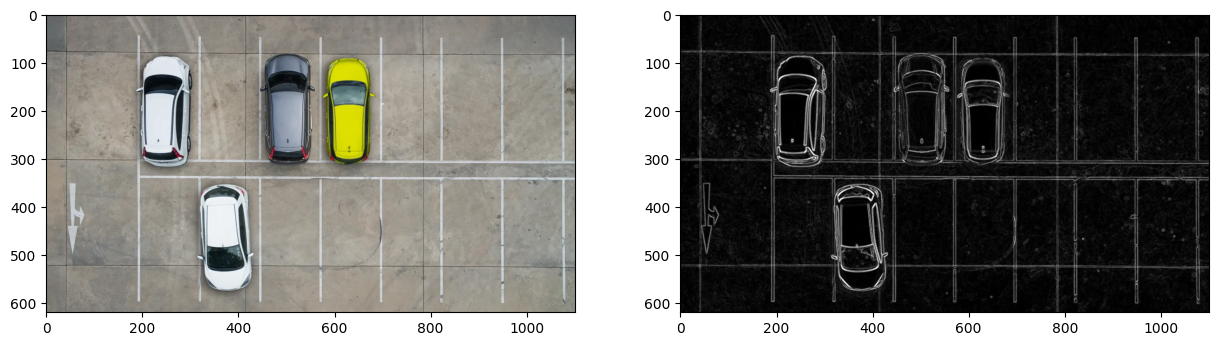

In [4]:
print('====Sobel Edge Detection====')
img_car = cv.imread('/content/drive/MyDrive/Mechine Learning /car-park.jpg') 

# converting to gray scale
gray = cv.cvtColor(img_car, cv.COLOR_BGR2GRAY)

# remove noise
img_n = cv.GaussianBlur(gray,(3,3),0)

# obtaining a horizontal and vertical Sobel filtering of the image
img_sobelx = cv.Sobel(img_n, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img_n, cv.CV_64F, 0, 1, ksize=3)

# image with both horizontal and vertical Sobel kernels applied
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img_car, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img_car, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy, cmap = 'gray')

====Canny Edge Detection====


(<Axes: >, <matplotlib.image.AxesImage at 0x7f69b65cde70>)

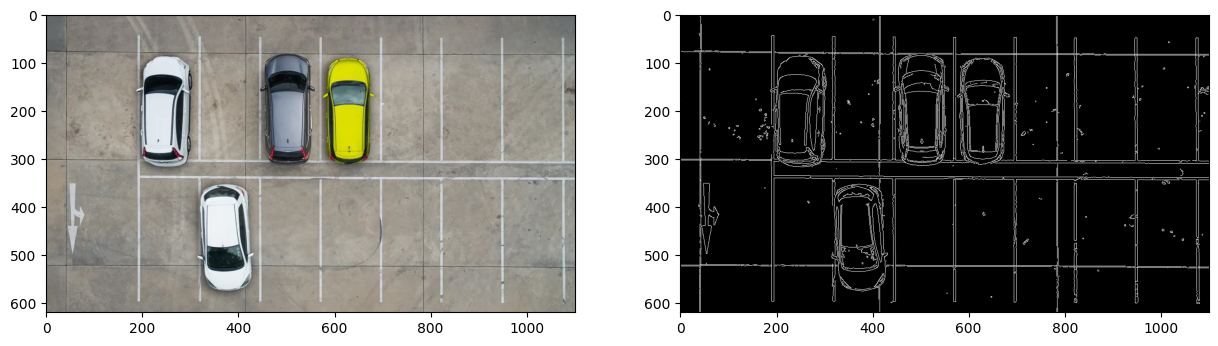

In [5]:
print('====Canny Edge Detection====')
edged = cv.Canny(img_car, 100, 200)

f, axarr = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121), plt.imshow(cv.cvtColor(img_car, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img_car, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(edged, cmap = 'gray')

====Laplacian Edge===


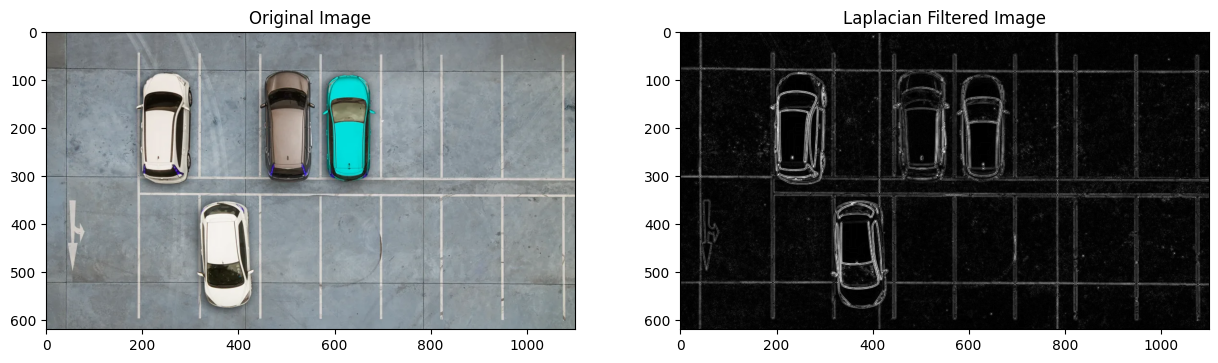

In [6]:
print('====Laplacian Edge===')
image_original = cv.imread('/content/drive/MyDrive/Mechine Learning /car-park.jpg', cv.IMREAD_COLOR)
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(image_gray,(3,3),0)

filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)

filtered_image = cv.convertScaleAbs(filtered_image)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

## Nomor 5
Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada 
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan 
luaran sebagai berikut: 

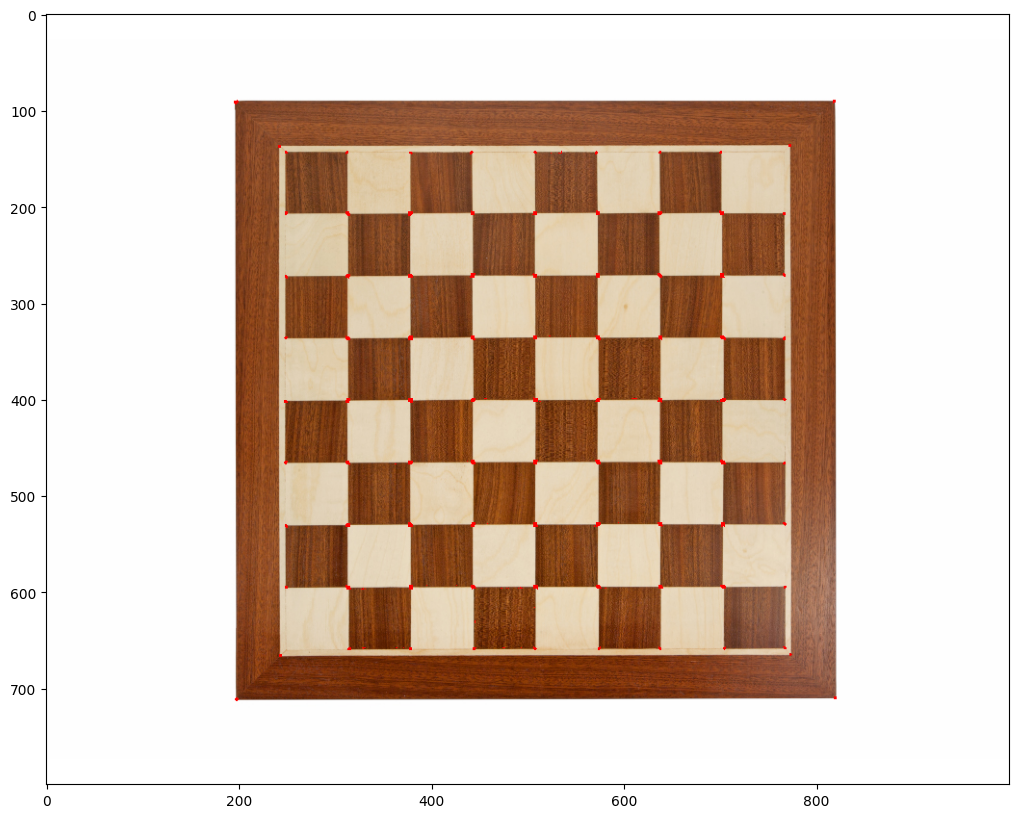

In [9]:
#Harris Corner Detection
img_cb = cv.imread('/content/drive/MyDrive/Mechine Learning /chess-board.jpg')
img_gcb = cv.cvtColor(img_cb, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(img_gcb,3,1,0.04)

img_gray = np.float32(img_gcb)
harris_output = cv.cornerHarris(img_gray,2,3, 3)

harris_output = cv.dilate(harris_output, None)

img_cb[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img_cb, cv.COLOR_BGR2RGB))

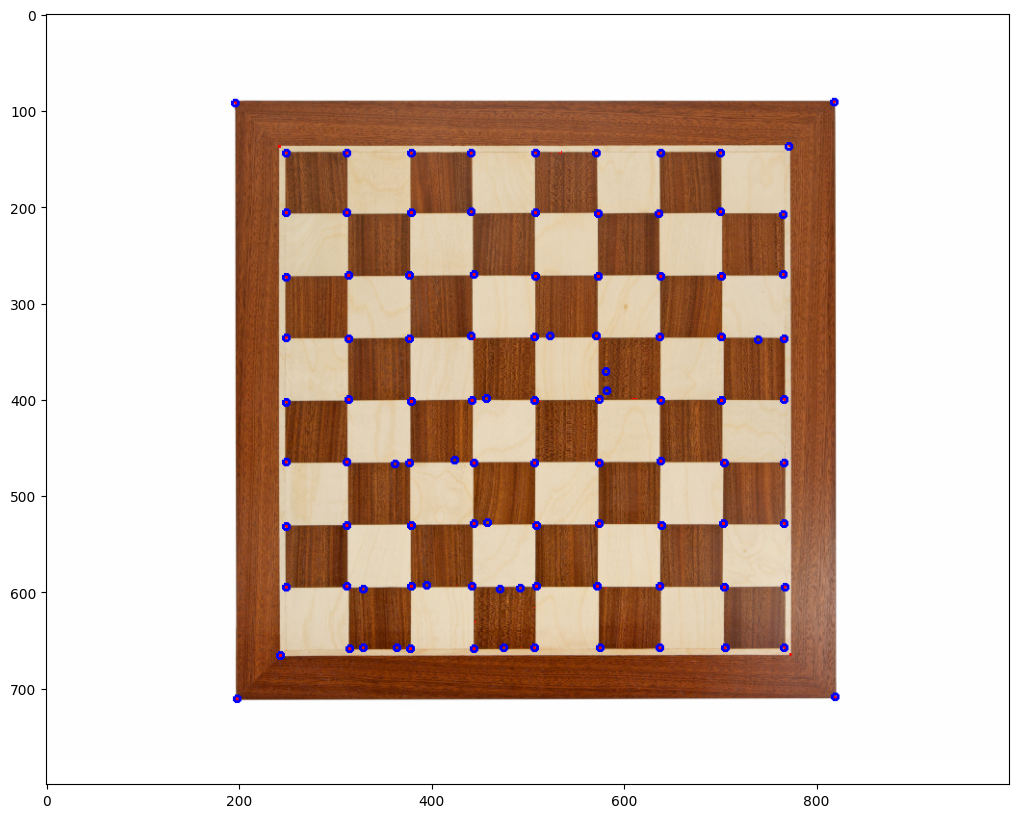

In [10]:
#Shi-Tomasi Detection
corners = cv.goodFeaturesToTrack(img_gcb, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(img_cb, (x,y),3,255,2)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img_cb, cv.COLOR_BGR2RGB))

## Nomor 6
Implementasikan metode Hough Transform pada OpenCV dengan menggunakan 
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan 
teori, sehingga menghasilkan luaran sebagai berikut: 

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


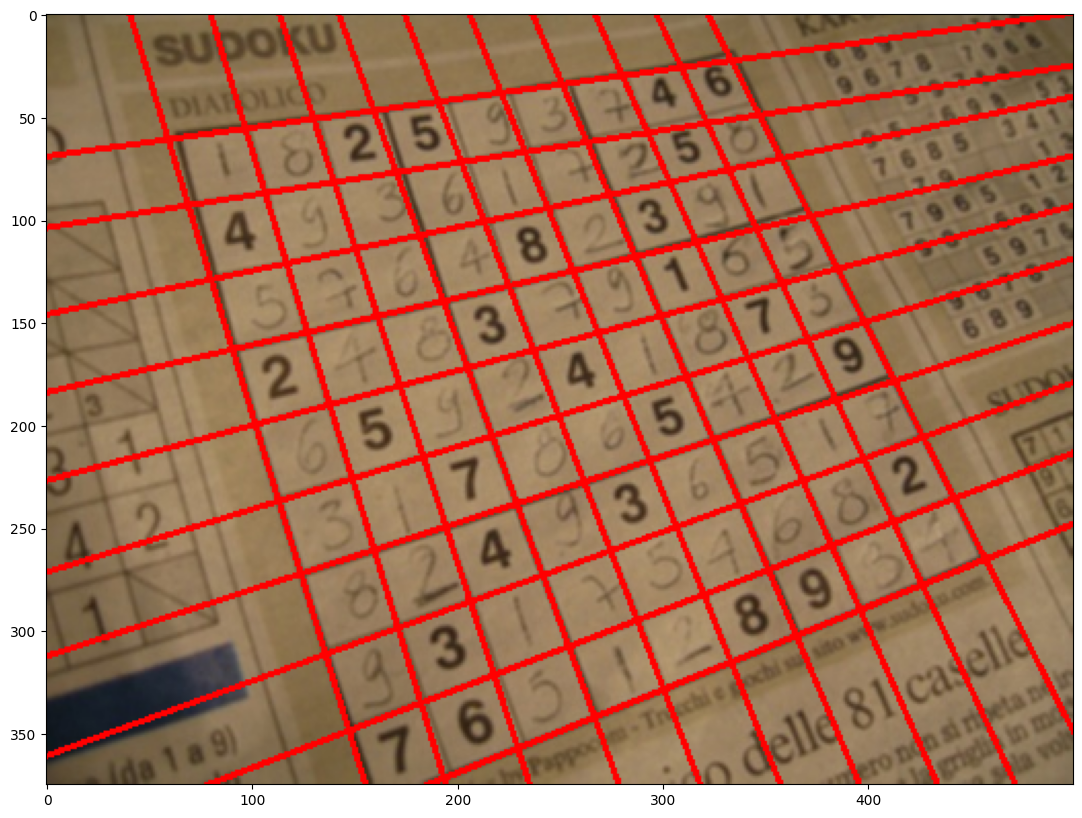

In [11]:
img_s = cv.imread('/content/drive/MyDrive/Mechine Learning /sudoku.jpg') 
img_gs = cv.cvtColor(img_s, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gs, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges, kernel, iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges, 1, np.pi / 180, 150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines )) 
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(img_s, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10)) 
    plt.imshow(cv.cvtColor(img_s, cv.COLOR_BGR2RGB))

## Nomor 7
Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan 
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut: 

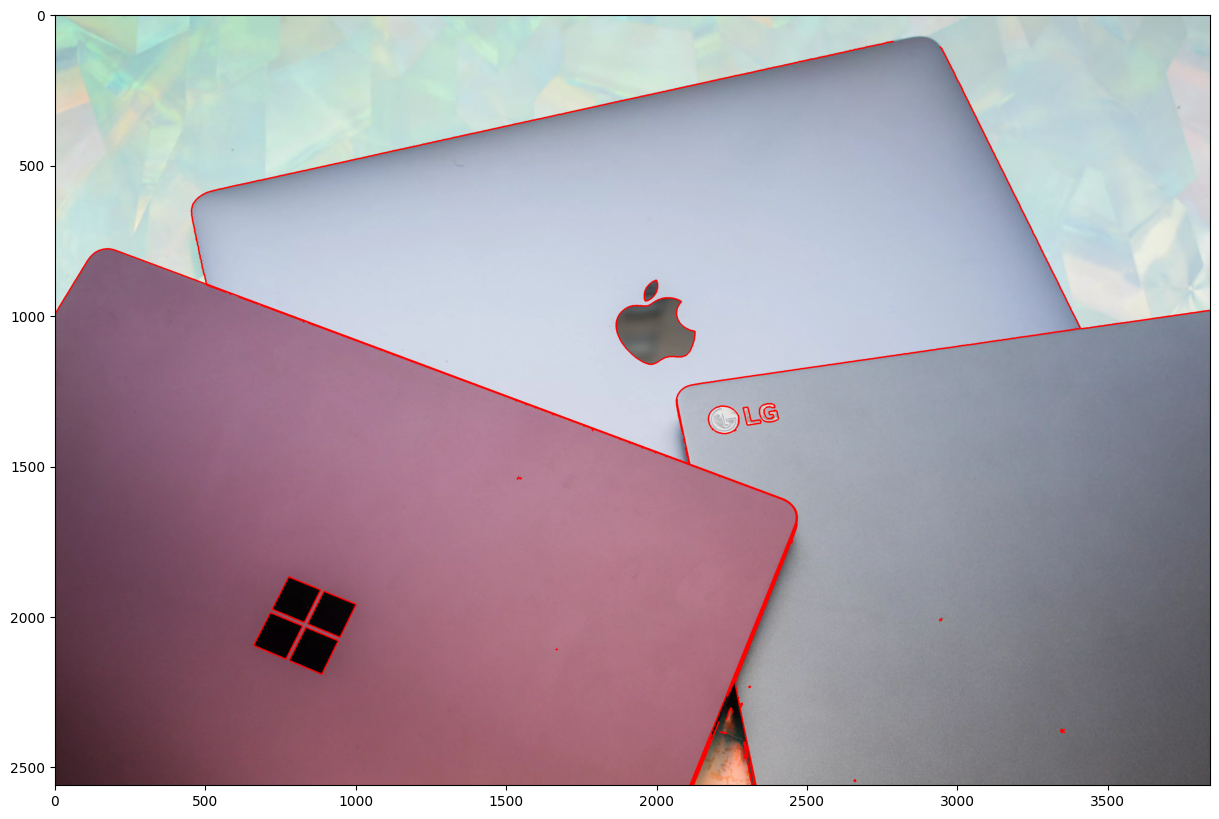

In [12]:
img = cv.imread('/content/drive/MyDrive/Mechine Learning /laptop.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))